<a href="https://colab.research.google.com/github/soumik12345/Kinect-Vision/blob/master/Skin_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings, os
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import cv2, random, imutils, pprint
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt

In [0]:
image =  imutils.url_to_image("https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/82764696-open-palm-hand-gesture-of-male-hand_image_from_123rf.com.jpg")
image = imutils.resize(image, width = 250)

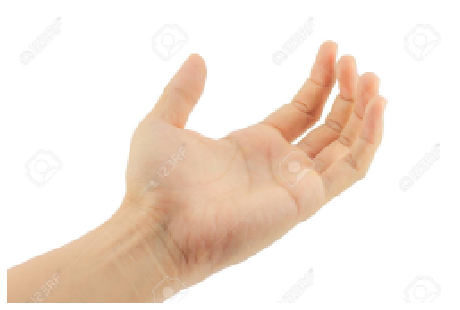

In [0]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
def extract_skin(image):
  img = image.copy()
  img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  lower = np.array([0, 48, 80], dtype = np.uint8)
  upper = np.array([20, 255, 255], dtype = np.uint8)
  skin_mask = cv2.inRange(img, lower, upper)
  skin_mask = cv2.GaussianBlur(skin_mask, (3, 3), 0)
  skin = cv2.bitwise_and(img, img, mask = skin_mask)
  return cv2.cvtColor(skin, cv2.COLOR_HSV2BGR), skin_mask

In [0]:
skin, mask = extract_skin(image)

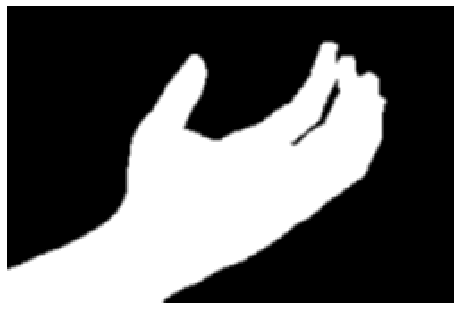

In [0]:
plt.imshow(mask, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

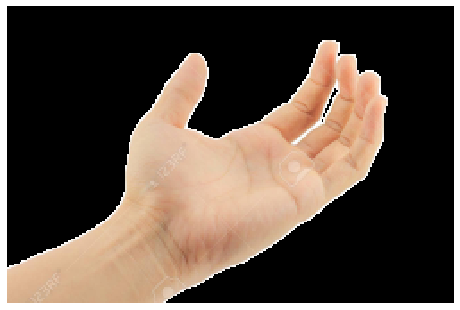

In [0]:
plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

## Segmentation Using K-Means Clustering

In [0]:
# canny_output = cv2.Canny(image[:, :, 0], 100, 200)
# # _, contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# # drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype = np.uint8)
# # for i in range(len(contours)):
# #   color = (random.randint(0, 256), random.randint(0, 256), random.randint(0, 256))
# #   cv2.drawContours(drawing, contours, i, color, 2, cv2.LINE_8, hierarchy, 0)


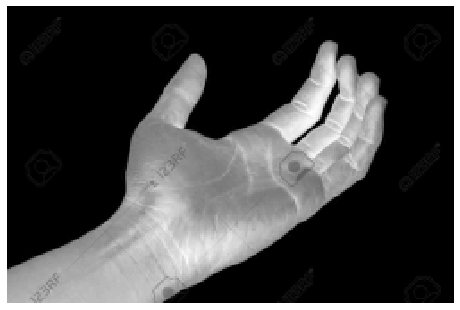

In [0]:
plt.imshow(image[:, :, 0])
plt.xticks([])
plt.yticks([])
plt.show()

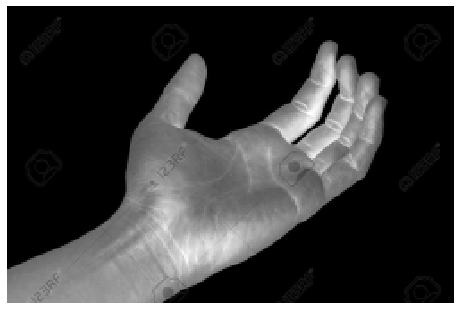

In [0]:
plt.imshow(image[:, :, 1])
plt.xticks([])
plt.yticks([])
plt.show()

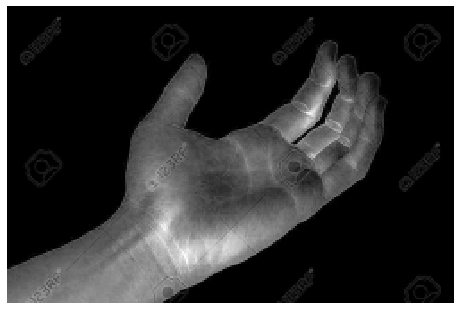

In [0]:
plt.imshow(image[:, :, 2])
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
X = image[:, :, 0].flatten()
X = np.reshape(X, (X.shape[0], 1))
X.shape

(41500, 1)

In [0]:
y_pred = KMeans(n_clusters = 2, random_state = 170).fit_predict(X)
y_pred.shape

(41500,)

In [0]:
y_pred = y_pred.reshape(image.shape[0], image.shape[1])
y_pred.shape

(166, 250)

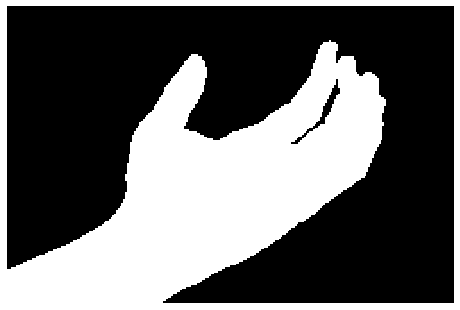

In [0]:
plt.imshow(np.invert(y_pred))
plt.xticks([])
plt.yticks([])
plt.show()